In [1]:
import torch.optim as optim
import gymnasium as gym

from simple_ppo import PPO
from simple_ppo.policy import ContinuMlpPolicy
from simple_ppo.utils import evaluate, plot

In [2]:
policy = ContinuMlpPolicy(state_dim=11, action_dim=3, sd_init=0.6, sd_rng=(0.01, 0.6))
optimizer = optim.Adam(policy.parameters(), lr=0.0001)

In [3]:
env = gym.make('Hopper-v4', render_mode=None)
env_eval = gym.make('Hopper-v4', render_mode=None)

agent = PPO(policy, optimizer, env, env_eval,
            gamma=0.99, gae_lambda=0.95, n_step=4096, batch_size=128, n_epochs=32,
            clip_eps=0.1, vf_coef=1.0, ent_coef=0.01, max_grad_norm=1.0,
            eval_num=4)

log = agent.train(total_timesteps=1000000)

env.close()
env_eval.close()

| timestep   4096 | policy   -6.223 | value   +3.082 | entropy   +0.866 | reward   +23.1 |
| timestep   8192 | policy   -5.287 | value   +4.153 | entropy   +0.795 | reward   +45.1 |
| timestep  12288 | policy   -8.211 | value   +7.205 | entropy   +0.732 | reward  +115.2 |
| timestep  16384 | policy   -9.651 | value   +9.394 | entropy   +0.678 | reward   +73.6 |
| timestep  20480 | policy  -11.471 | value  +11.161 | entropy   +0.629 | reward   +66.8 |
| timestep  24576 | policy  -10.586 | value  +12.888 | entropy   +0.590 | reward  +171.8 |
| timestep  28672 | policy  -11.279 | value  +14.383 | entropy   +0.559 | reward  +211.3 |
| timestep  32768 | policy  -12.269 | value  +14.011 | entropy   +0.530 | reward  +207.6 |
| timestep  36864 | policy  -10.583 | value  +13.726 | entropy   +0.498 | reward  +206.8 |
| timestep  40960 | policy  -10.250 | value  +11.901 | entropy   +0.472 | reward  +207.6 |
| timestep  45056 | policy   -9.370 | value  +10.878 | entropy   +0.451 | reward  +209.0 |

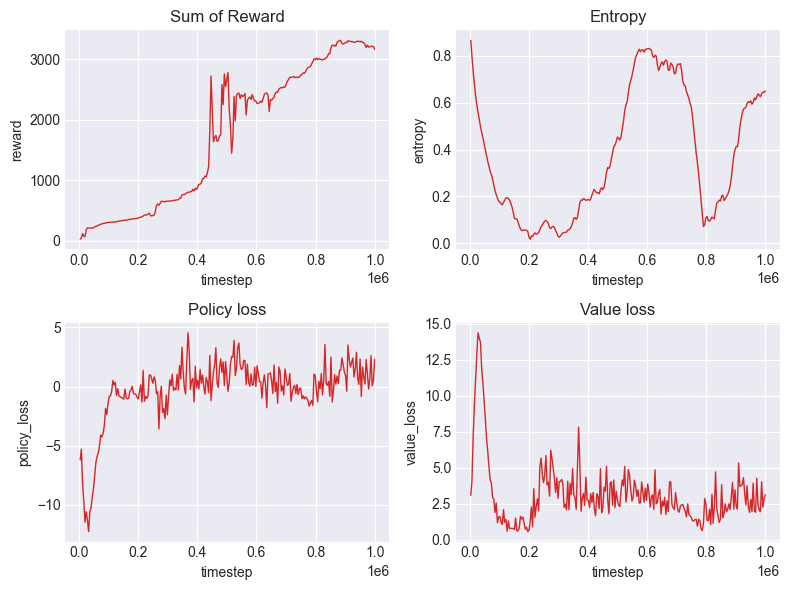

In [4]:
plot(log)

In [5]:
env = gym.make('Hopper-v4', render_mode=None)
mean, std = evaluate(policy, env, eval_num=32)
env.close()

print('mean : %f    std : %f'%(mean, std))

c:\Users\gram15\Documents\1 My Folder\Projects\Simple-PPO\venv\Lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment Hopper-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


mean : 3163.239502    std : 9.055386


In [7]:
env = gym.make('Hopper-v4', render_mode='human')
evaluate(policy, env, eval_num=1, deterministic=True)
env.close()